In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from numpy.linalg import inv
import random
import csv


In [81]:

#import training data
x_train = []
y_train = []
     
with open('datasets/Dataset_1_train.csv') as csvfile:
    train_data = csv.reader(csvfile, delimiter=',')
    for line in train_data:
        x_train.append(float(line[0]))
        y_train.append(float(line[1]))  
def make_matrix_data(x_train, degree):
    X = []
    for x in x_train:
        l = [1]
        for i in range(1,degree + 1):
            l.append(x**i)
        X.append(l)
    return X

X = np.asarray(make_matrix_data(x_train, 20))
y = np.asarray(y_train)
        
    

Now we have from above the observation matrix is

$$X = \begin{pmatrix}
  1 && x_{11} && \cdots & x_{1n}\\
  \vdots &&  \vdots && \ddots & \vdots \\
  1 && x_{n1}&& \cdots & x_{nn}
  \end{pmatrix}$$
  
with our estimate for parameter being:

$$\hat{\omega} = (X^T X)^{-1}X y$$

We can have the estimate for our output with new $X^{(new)}$, which are our new observed data. Then we have:

$$\hat{y} = X^{(new)} \hat{\omega}$$
$$\hat{y} = X^{(new)} (X^T X)^{-1}X y$$
we now calculate omega

In [82]:
omega = np.matmul(np.matmul(inv(np.matmul(np.transpose(X), X)),np.transpose(X)),y)

x_valid = []
y_valid = []
with open('datasets/Dataset_1_valid.csv') as csvfile:
    train_data = csv.reader(csvfile, delimiter=',')
    for line in train_data:
        x_valid.append(float(line[0]))
        y_valid.append(float(line[1]))  
X_valid = np.asarray(make_matrix_data(x_valid, 20))
y_valid = np.asarray(y_valid)
        
##test data##

x_test = []
y_test = []
with open('datasets/Dataset_1_test.csv') as csvfile:
    train_data = csv.reader(csvfile, delimiter=',')
    for line in train_data:
        x_test.append(float(line[0]))
        y_test.append(float(line[1]))  
X_test = np.asarray(make_matrix_data(x_test, 20))
y_test = np.asarray(y_test)
        


The regressional analysis gives that the training MSE using the parameter is:

$$S = \frac{1}{2} ||\hat{y}(\hat{\omega}, X) - y)||_2$$

and MSE for validation is:
$$S = \frac{1}{2} ||\hat{y}(\hat{\omega}, X^{(new)}) - y^{(new)}||_2$$

where these new dataset are given by validation set. We now calculate the MSE

In [83]:
MSE_train = 1/len(y) * np.matmul(np.transpose(np.subtract(np.matmul(X,omega),y)),np.subtract(np.matmul(X,omega),y))
MSE_valid = 1/len(y) * np.matmul(np.transpose(np.subtract(np.matmul(X_valid,omega),y_valid)),np.subtract(np.matmul(X_valid,omega),y_valid))
print("The MSE for training is", MSE_train)
print("The MSE for validation is", MSE_valid)

The MSE for training is 6.474733379982946
The MSE for validation is 1418.3916624664932


We now visualize the fit:

In [84]:
x_plot = np.linspace(-0.965,0.968,500)
y_plot = np.matmul(make_matrix_data(x_plot, 20),omega)

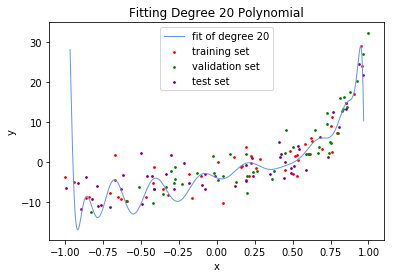

In [85]:
plt.plot(x_plot,y_plot, linewidth=1, color='cornflowerblue', label="fit of degree 20")
plt.scatter(x_train,y_train, color='red', label="training set", s = 3)
plt.scatter(x_valid,y_valid, color='green', label="validation set", s = 3)
plt.scatter(x_test,y_test, color='purple', label="test set", s = 3)

plt.legend(loc='best')


plt.ylabel('y')
plt.xlabel('x')
plt.title('Fitting Degree 20 Polynomial')
plt.show()

our new omega now with the ridge regression is: 


The best lambda is  0.013


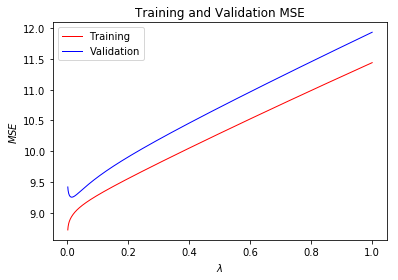

In [87]:
def regularization(X,y,Lambda):
    lambda_identity= np.zeros((len(X[0]),len(X[0])), float)
    np.fill_diagonal(lambda_identity, Lambda)
    return np.matmul(np.matmul(inv(np.add(np.matmul(np.transpose(X), X),lambda_identity )),np.transpose(X)),y)

omega_regular = []
lnlambda = []
lambdas = []
MSE_train_regular = []
MSE_valid_regular = []
for i in range(1,1001):
    omega_regular.append(regularization(X,y,i/1000))
    lambda_temp = i/1000
    H = np.matmul(np.transpose(np.subtract(np.matmul(X,omega_regular[i-1]),y)),np.subtract(np.matmul(X,omega_regular[i-1]),y))
    MSE_train_regular.append(1/len(y) * (H+lambda_temp*(np.matmul(np.transpose(omega_regular[i-1]),omega_regular[i-1]))))
    H_val = np.matmul(np.transpose(np.subtract(np.matmul(X_valid,omega_regular[i-1]),y_valid)),np.subtract(np.matmul(X_valid,omega_regular[i-1]),y_valid))
    MSE_valid_regular.append(1/len(y) * (H_val+lambda_temp*(np.matmul(np.transpose(omega_regular[i-1]),omega_regular[i-1]))))
    lambdas.append(lambda_temp)
    
##choosing lambda by different standards    
lambda_index = np.argmin([a_i - b_i for a_i,b_i in zip(MSE_valid_regular,MSE_train_regular)])
lambda_index2 = np.argmin([a_i + b_i for a_i,b_i in zip(MSE_valid_regular,MSE_train_regular)])
lambda_index3 = np.argmin([MSE_valid_regular])
plt.plot(lambdas, MSE_train_regular, linewidth=1, color='red', label="Training")
plt.plot(lambdas, MSE_valid_regular, linewidth=1, color='blue', label="Validation")
plt.legend(loc='best')
#print("The best lambda is ",lambda_index/1000)
print("The best lambda is ",lambda_index3/1000)

best_omega = omega_regular[lambda_index]

plt.ylabel('$MSE$')
plt.xlabel('$\lambda$')
plt.title('Training and Validation MSE')

plt.show()    
    
    
    

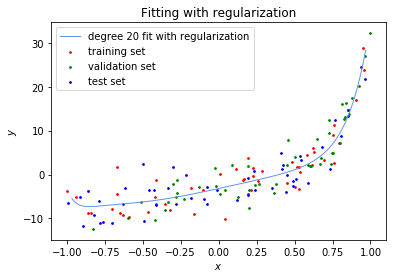

In [10]:
y_plot_regular = np.matmul(make_matrix_data(x_plot, 20),best_omega)
x_test = []
y_test = []
with open('datasets/Dataset_1_test.csv') as csvfile:
    train_data = csv.reader(csvfile, delimiter=',')
    for line in train_data:
        x_test.append(float(line[0]))
        y_test.append(float(line[1]))  
X_test = np.asarray(make_matrix_data(x_test, 20))
y_test = np.asarray(y_test)


H = np.matmul(np.transpose(np.subtract(np.matmul(X_test,omega_regular[lambda_index-1]),y_test)),np.subtract(np.matmul(X_test,omega_regular[lambda_index-1]),y_test))

plt.plot(x_plot,y_plot_regular, linewidth=1, color='cornflowerblue', label="degree 20 fit with regularization")
plt.scatter(x_train,y_train, color='red', label="training set", s = 3)
plt.scatter(x_valid,y_valid, color='green', label="validation set", s = 3)
plt.scatter(x_test,y_test, color='blue', label="test set", s = 3)
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.title('Fitting with regularization')
plt.legend(loc='best')

plt.show()

We now see which fit would be the best fit for this data

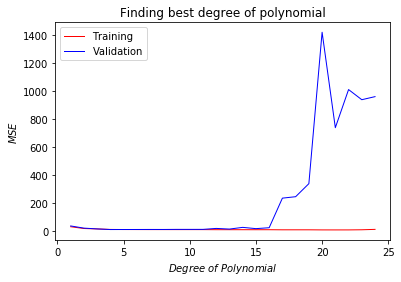

In [11]:
MSE_train_array = []
MSE_valid_array = []
for i in range(1,25):
    X = np.asarray(make_matrix_data(x_train, i))
    x_valid = []
    y_valid = []
    with open('datasets/Dataset_1_valid.csv') as csvfile:
        train_data = csv.reader(csvfile, delimiter=',')
        for line in train_data:
            x_valid.append(float(line[0]))
            y_valid.append(float(line[1]))  
    X_valid = np.asarray(make_matrix_data(x_valid, i))
    y_valid = np.asarray(y_valid)
    omega = np.matmul(np.matmul(inv(np.matmul(np.transpose(X), X)),np.transpose(X)),y)
    
    MSE_train_array.append(1/len(y) * np.matmul(np.transpose(np.subtract(np.matmul(X,omega),y)),np.subtract(np.matmul(X,omega),y)))
    MSE_valid_array.append(1/len(y) * np.matmul(np.transpose(np.subtract(np.matmul(X_valid,omega),y_valid)),np.subtract(np.matmul(X_valid,omega),y_valid)))

x_plot = [i for i in range(1,25)]    
    
plt.plot(x_plot,MSE_train_array, linewidth=1, color='red', label="Training")
plt.plot(x_plot,MSE_valid_array, linewidth=1, color='blue', label="Validation")

plt.ylabel('$MSE$')
plt.xlabel('$Degree\ of\ Polynomial$')
plt.title('Finding best degree of polynomial')

plt.legend(loc='best')
plt.show()


We can see from above that degree 20 has significantly higher validation error than training error which indiciates that the degree 20 model is exhibiting overfitting

Linear regression has the following objective function:
$$ L(\omega_0, \omega_1) = \frac{1}{2N} [\sum_{i=1}^N (\omega_0 + \omega_1x^{(i)} - y^{(i)})^2]$$

with the following partial derivatives:
$$ \frac{dL(\omega_0, \omega_1)}{d\omega_0} = \frac{1}{N} [\sum_{i=1}^N (\omega_0 + \omega_1x^{(i)} - y^{(i)})]$$
$$ \frac{dL(\omega_0, \omega_1)}{d\omega_1} = \frac{1}{N} [\sum_{i=1}^N (\omega_0 + \omega_1x^{(i)} - y^{(i)})x^{(i)}]$$

with this we use the online-SGD with following algorithm using:

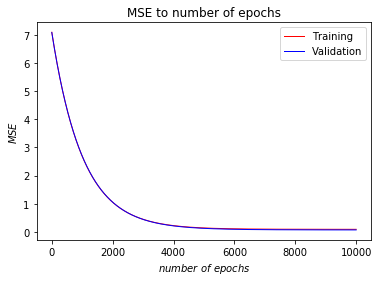

In [12]:
x2_train = []
y2_train = []
x2_valid = []
y2_valid = []
x2_test = []
y2_test = []

with open('datasets/Dataset_2_train.csv') as csvfile:
    train_data = csv.reader(csvfile, delimiter=',')
    for line in train_data:
        x2_train.append(float(line[0]))
        y2_train.append(float(line[1]))

with open('datasets/Dataset_2_valid.csv') as csvfile:
    train_data = csv.reader(csvfile, delimiter=',')
    for line in train_data:
        x2_valid.append(float(line[0]))
        y2_valid.append(float(line[1]))

with open('datasets/Dataset_2_test.csv') as csvfile:
    train_data = csv.reader(csvfile, delimiter=',')
    for line in train_data:
        x2_test.append(float(line[0]))
        y2_test.append(float(line[1]))        
max_epoch = 10000        
def stochastic_gradient_descent(step_size, max_epoch):        

    params = [2,3]


    MSE_train_array = []
    MSE_valid_array = []
    epoch = 0

    while epoch < max_epoch:
        training_error = 0
        validation_error = 0

        for x,y in zip(x2_train,y2_train):
            estimate_y = [params[0] + params[1]*i for i in x2_train]

            params[0] = params[0] - (step_size*(params[0] + params[1]*x  - y))
            params[1] = params[1] - (step_size*(params[0] + params[1]*x - y) *x)

        for x,y in zip(x2_train,y2_train):
            training_error += (y - (params[0] + params[1]*x ))**2
        training_error = training_error/len(y2_train)

        for x,y in zip(x2_valid,y2_valid):
            validation_error += (y - (params[0] + params[1]*x ))**2
        validation_error = validation_error/len(y2_valid)

        MSE_train_array.append(training_error)
        MSE_valid_array.append(validation_error)
        epoch = epoch + 1
    return MSE_train_array, MSE_valid_array ,params
MSE_train_array, MSE_valid_array, params = stochastic_gradient_descent(0.000001, max_epoch)

plt.plot([i for i in range(1,max_epoch + 1)],MSE_train_array, linewidth=1, color='red', label="Training")
plt.plot([i for i in range(1,max_epoch + 1)],MSE_valid_array, linewidth=1, color='blue', label="Validation")
plt.legend(loc='best')    

plt.ylabel('$MSE$')
plt.xlabel('$number\ of\ epochs$')
plt.title('MSE to number of epochs')


plt.show()    
        

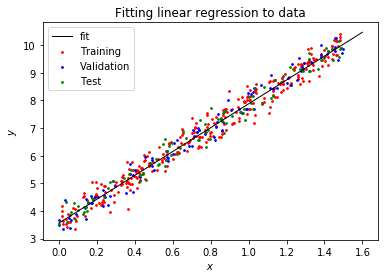

In [13]:
plt.scatter(x2_train, y2_train, color='red', label="Training", s=3)
plt.scatter(x2_valid, y2_valid, color='blue', label="Validation", s=3)
plt.scatter(x2_test, y2_test, color='green', label="Test", s=3)

plt.plot([i for i in np.linspace(0,1.6,1000)], [params[1]*i + params[0] for i in np.linspace(0,1.6,1000)], color='black'
         , linewidth=1, label="fit" )
plt.legend(loc='best')    



plt.ylabel('$y$')
plt.xlabel('$x$')
plt.title('Fitting linear regression to data')


plt.show()    
        

In [14]:
MSE_valid_array_final = []
for i in range(1,6):
    MSE_train_array, MSE_valid_array, params = stochastic_gradient_descent((3**i)*0.000001, max_epoch)
    MSE_valid_array_final.append(MSE_valid_array[len(MSE_valid_array) - 1])
    print("The final validation MSE for step stepsize of " + repr((3**i)*0.000001)+ " is " + repr(MSE_valid_array_final[i -1]) )
    
print("The best step size out of the candidates according to validation MSE is ", (3**(np.argmin(MSE_valid_array_final) + 1))*0.000001 )



test_error = 0
for x,y in zip(x2_valid,y2_valid):
    test_error += (y - (params[0] + params[1]*x ))**2


print("The test MSE of the chosen model is", test_error)

The final validation MSE for step stepsize of 3e-06 is 0.07386413801303966
The final validation MSE for step stepsize of 9e-06 is 0.07403723518465592
The final validation MSE for step stepsize of 2.7e-05 is 0.07406775304434833
The final validation MSE for step stepsize of 8.099999999999999e-05 is 0.07406287451650248
The final validation MSE for step stepsize of 0.000243 is 0.0740482394691368
The best step size out of the candidates according to validation MSE is  3e-06
The test MSE of the chosen model is 7.40482394691368


Due to computational constraint we will run 10 epochs and show the evolution of the fit


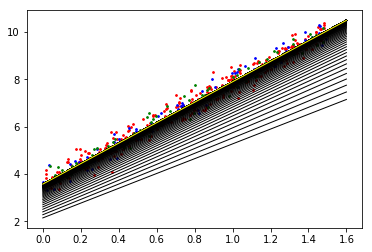

In [15]:
    step_size = 0.0001
    params = [2,3]


    MSE_train_array = []
    MSE_valid_array = []
    epoch = 0
    plt.scatter(x2_train, y2_train, color='red', label="Training", s=3)
    plt.scatter(x2_valid, y2_valid, color='blue', label="Validation", s=3)
    plt.scatter(x2_test, y2_test, color='green', label="Test", s=3)
    while epoch < 1000:
        training_error = 0
        validation_error = 0

        for x,y in zip(x2_train,y2_train):
            estimate_y = [params[0] + params[1]*i for i in x2_train]

            params[0] = params[0] - (step_size*(params[0] + params[1]*x  - y))
            params[1] = params[1] - (step_size*(params[0] + params[1]*x - y) *x)

        for x,y in zip(x2_train,y2_train):
            training_error += (y - (params[0] + params[1]*x ))**2
        training_error = training_error/len(y2_train)

        for x,y in zip(x2_valid,y2_valid):
            validation_error += (y - (params[0] + params[1]*x ))**2
        validation_error = validation_error/len(y2_valid)

        MSE_train_array.append(training_error)
        MSE_valid_array.append(validation_error)
        epoch = epoch + 1
        if (epoch % 2) ==0 :
            plt.plot([i for i in np.linspace(0,1.6,1000)], [params[1]*i + params[0] for i in np.linspace(0,1.6,1000)], color='black' , linewidth=1, label="fit" )
    plt.plot([i for i in np.linspace(0,1.6,1000)], [params[1]*i + params[0] for i in np.linspace(0,1.6,1000)], color='yellow' , linewidth=1, label="fit" )

    plt.show()

This is not the optimal way of filling in the missing attribute. Better way could be using decision bondaries, either by linear model or K-NN, to classify, or using regression for predict the outcome.

In [6]:

##randomized 80-20 split
def randomized_data():
    x3_data = []
    y3_data = []
    data_array = []

    with open('Datasets/communities.data') as csvfile:
        data = csv.reader(csvfile, delimiter=',')
        for line in data:
            data_array.append(line)
    random.shuffle(data_array)      
    random.shuffle(data_array) 
    random.shuffle(data_array)   
    for line in data_array:
        x3_data.append(line[5:126])
        y3_data.append(line[127])
    for row in x3_data:
        for x in row:
            try:
                value = float(x)
                x = value
            except ValueError:
                continue
    print(x3_data)
    mean = [0 for i in range(1,122)]
    N_question = [0 for i in range(1,122)]
    for i in range(0,len(x3_data)):
        for j in range(0,len(x3_data[0])):
            if x3_data[i][j] != '?':
                mean[j] += float(x3_data[i][j])
            else:
                N_question[j] += 1

    #total/(#entry - #question marks)
    mean = [mean[i]/(len(x3_data) - N_question[i]) for i in range(0,len(mean))]            
    N_questionmark = 0
    for i in range(0,len(x3_data)):
        for j in range(0,len(x3_data[0])):
            if x3_data[i][j] == '?':
                x3_data[i][j] = mean[j]
    return x3_data, y3_data


randomized1_x,randomized1_y = randomized_data() 
print(randomized1_x)
randomized2_x,randomized2_y = randomized_data()                
randomized3_x,randomized3_y = randomized_data()                
randomized4_x,randomized4_y = randomized_data()                
randomized5_x,randomized5_y = randomized_data()                
def split(x,y):
    spl = int(0.8*len(x))
    return x[:spl],x[spl:],y[:spl],y[spl:]

trainx_1,testx_1,trainy_1,testy_1 = split(randomized1_x,randomized1_y)
trainx_2,testx_2,trainy_2,testy_2 = split(randomized2_x,randomized2_y)
trainx_3,testx_3,trainy_3,testy_3 = split(randomized3_x,randomized3_y)
trainx_4,testx_4,trainy_4,testy_4 = split(randomized4_x,randomized4_y)
trainx_5,testx_5,trainy_5,testy_5 = split(randomized5_x,randomized5_y)



        



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


[['0.08', '0.47', '0.13', '0.83', '0.22', '0.04', '0.4', '0.53', '0.3', '0.27', '0.09', '1', '0.44', '0.73', '0.12', '0.52', '0.33', '0.21', '0.36', '0.43', '0.37', '0.37', '0.31', '0.21', '0.32', '0.29', '0.35', '0.03', '0.13', '0.16', '0.34', '0.34', '0.28', '0.66', '0.42', '0.37', '0.38', '0.45', '0.47', '0.45', '0.42', '0.46', '0.56', '0.7', '0.69', '0.84', '0.68', '0.35', '0.44', '0.02', '0.2', '0.02', '0.29', '0.32', '0.4', '0.41', '0.13', '0.13', '0.14', '0.13', '0.84', '0.09', '0.25', '0.23', '0.5', '0.67', '0.27', '0.6', '0.12', '0.55', '0', '0.09', '0.69', '0.51', '0.04', '0.09', '0.67', '0.05', '0.18', '0.29', '0.27', '0.27', '0.52', '0.51', '0.55', '0.53', '0.43', '0.61', '0.56', '0', '0', '0.19', '0.78', '0.58', '0.56', '0.71', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '0.06', '0.24', '0.24', '?', '?', '?', '?', '0'], ['0.03', '0.48', '0.12', '0.76', '0.54', '0.07', '0.27', '0.43', '0.2', '0.18', '0.03', '0.86', '0.7', '0.86', '0.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [71]:
def train_regression(x,y):
    X = []
    for row in x:
        l = [1]
        for column in row:
            l.append(float(column))     
        X.append(l)
    y = [float(i) for i in y]
    omega = np.matmul(np.matmul(inv(np.matmul(np.transpose(X), X)),np.transpose(X)),y)
    
    return X,y,omega
    
    
def test_MSE(test_X,test_y,omega):
    X = []
    for row in test_X:
        l = [1]
        for column in row:
            l.append(float(column))     
        X.append(l)
    y = [float(i) for i in test_y]
        
    MSE = 1/len(X) * np.matmul(np.transpose(np.subtract(np.matmul(X,omega),y)),np.subtract(np.matmul(X,omega),y))
    return MSE
X,y,omega1 = train_regression(trainx_1,trainy_1)
MSE_1 = test_MSE(testx_1,testy_1,omega1)
X,y,omega2 = train_regression(trainx_2,trainy_2)
MSE_2 = test_MSE(testx_2,testy_2,omega2)
X,y,omega3 = train_regression(trainx_3,trainy_3)
MSE_3 = test_MSE(testx_3,testy_3,omega3)
X,y,omega4 = train_regression(trainx_4,trainy_4)
MSE_4 = test_MSE(testx_4,testy_4,omega4)
X,y,omega5 = train_regression(trainx_5,trainy_5)
MSE_5 = test_MSE(testx_5,testy_5,omega5)


print("The MSE for the testset1 is ",MSE_1)
print("The MSE for the testset2 is ",MSE_2)
print("The MSE for the testset3 is ",MSE_3)
print("The MSE for the testset4 is ",MSE_4)
print("The MSE for the testset5 is ",MSE_5)

print("The average MSE for these 5 datasets is ", (MSE_1 + MSE_2 + MSE_3 + MSE_4 + MSE_5)/5)


The MSE for the testset1 is  0.7464564432347901
The MSE for the testset2 is  0.020574167093894688
The MSE for the testset3 is  0.022611937070608944
The MSE for the testset4 is  0.020563922212940105
The MSE for the testset5 is  3.226274185121604
The average MSE for these 5 datasets is  0.8072961309467676


In [89]:

randomized1_x,randomized1_y = randomized_data()                
randomized2_x,randomized2_y = randomized_data()                
randomized3_x,randomized3_y = randomized_data()                
randomized4_x,randomized4_y = randomized_data()                
randomized5_x,randomized5_y = randomized_data()                

trainx_1,testx_1,trainy_1,testy_1 = split(randomized1_x,randomized1_y)
trainx_2,testx_2,trainy_2,testy_2 = split(randomized2_x,randomized2_y)
trainx_3,testx_3,trainy_3,testy_3 = split(randomized3_x,randomized3_y)
trainx_4,testx_4,trainy_4,testy_4 = split(randomized4_x,randomized4_y)
trainx_5,testx_5,trainy_5,testy_5 = split(randomized5_x,randomized5_y)


def MSE_error_calculations(train_x,train_y,test_x,test_y):
    X_train = []
    for row in train_x:
        l = [1]
        for column in row:
            l.append(float(column))     
        X_train.append(l)
    y_train = [float(i) for i in train_y]    
    
    X_test = []
    for row in test_x:
        l = [1]
        for column in row:
            l.append(float(column))     
        X_test.append(l)
    y_test = [float(i) for i in test_y]    
    
    omega_regular = []
    lambda_value = []
    MSE_train_regular = []
    MSE_test_regular = []
    for i in range(1,1001):
        omega_regular.append(regularization(X_train,y_train,i/1000))
        lambda_temp = i/1000
        H = np.matmul(np.transpose(np.subtract(np.matmul(X_train,omega_regular[i-1]),y_train)),np.subtract(np.matmul(X_train,omega_regular[i-1]),y_train))
        MSE_train_regular.append(1/len(y_train)  * (H+lambda_temp*(np.matmul(np.transpose(omega_regular[i-1]),omega_regular[i-1]))))
        H_test = np.matmul(np.transpose(np.subtract(np.matmul(X_test,omega_regular[i-1]),y_test)),np.subtract(np.matmul(X_test,omega_regular[i-1]),y_test))
        MSE_test_regular.append(1/len(y_test) * (H_test+lambda_temp*(np.matmul(np.transpose(omega_regular[i-1]),omega_regular[i-1]))))
        lambda_value.append(lambda_temp)
    return MSE_train_regular, MSE_test_regular, lambda_value, omega_regular
MSE_train_regular1, MSE_test_regular1, lambda1, omega1 = MSE_error_calculations(trainx_1,trainy_1,testx_1,testy_1)        
MSE_train_regular2, MSE_test_regular2, lambda2, omega2 = MSE_error_calculations(trainx_2,trainy_2,testx_2,testy_2)        
MSE_train_regular3, MSE_test_regular3, lambda3, omega3 = MSE_error_calculations(trainx_3,trainy_3,testx_3,testy_3)        
MSE_train_regular4, MSE_test_regular4, lambda4, omega4 = MSE_error_calculations(trainx_4,trainy_4,testx_4,testy_4)        
MSE_train_regular5, MSE_test_regular5, lambda5, omega5 = MSE_error_calculations(trainx_5,trainy_5,testx_5,testy_5)
f1 = open('MSE_train_dataset_1', 'w+')
f1.write(",".join(str(i) for i in MSE_train_regular1))
f2 = open('MSE_train_dataset_2', 'w+')
f2.write(",".join(str(i) for i in MSE_train_regular2))
f3 = open('MSE_train_dataset_3', 'w+')
f3.write(",".join(str(i) for i in MSE_train_regular3))
f4 = open('MSE_train_dataset_4', 'w+')
f4.write(",".join(str(i) for i in MSE_train_regular4))
f5 = open('MSE_train_dataset_5', 'w+')
f5.write(",".join(str(i) for i in MSE_train_regular5))


g1 = open('MSE_test_dataset_1', 'w+')
g1.write(",".join(str(i) for i in MSE_test_regular1))
g2 = open('MSE_test_dataset_2', 'w+')
g2.write(",".join(str(i) for i in MSE_test_regular2))
g3 = open('MSE_test_dataset_3', 'w+')
g3.write(",".join(str(i) for i in MSE_test_regular3))
g4 = open('MSE_test_dataset_4', 'w+')
g4.write(",".join(str(i) for i in MSE_test_regular4))
g5 = open('MSE_test_dataset_5', 'w+')
g5.write(",".join(str(i) for i in MSE_test_regular5))

h1 = open('parameters1', 'w+')
h1.write(",".join(str(i) for i in omega1))
h2 = open('parameters2', 'w+')
h2.write(",".join(str(i) for i in omega1))
h3 = open('parameters3', 'w+')
h3.write(",".join(str(i) for i in omega1))
h4 = open('parameters4', 'w+')
h4.write(",".join(str(i) for i in omega1))
h5 = open('parameters5', 'w+')
h5.write(",".join(str(i) for i in omega1))




1671306

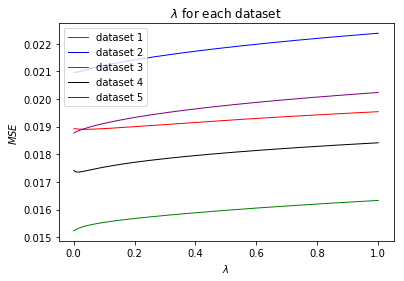

In [73]:
plt.plot(lambda1, MSE_test_regular1,linewidth=1, color='red', label="dataset 1")
plt.plot(lambda1, MSE_test_regular2,linewidth=1, color='blue', label="dataset 2")
plt.plot(lambda1, MSE_test_regular3,linewidth=1, color='green', label="dataset 3")
plt.plot(lambda1, MSE_test_regular4,linewidth=1, color='black', label="dataset 4")
plt.plot(lambda1, MSE_test_regular5,linewidth=1, color='purple', label="dataset 5")
plt.legend(loc='best')
plt.ylabel('$MSE$')
plt.xlabel('$\lambda$')
plt.title('$\lambda$ for each dataset')

plt.show()

In [75]:
print(np.argmin(MSE_test_regular2)/1000)
print(np.argmin(MSE_test_regular3)/1000)
print(np.argmin(MSE_test_regular4)/1000)
print(np.argmin(MSE_test_regular5)/1000)
print(np.argmin(MSE_test_regular1)/1000)

0.004
0.0
0.013
0.0
0.036
